# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up lists to hold response info
lat =[]
lng = []
maxTemp= []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []
names = []

#variable creation for print log
index_counter =0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"

query_url= url + "appid=" + weather_api_key + "&q="
    
for city in cities:
    try: 
        weather_response = requests.get(query_url + city).json()
        lat.append(weather_response ['coord']['lat'])
        lng.append(weather_response ['coord']['lon'])
        maxTemp.append(weather_response ['main']['temp_max'])
        humidity.append(weather_response ['main']['humidity'])
        cloudiness.append(weather_response ['clouds']['all'])
        windSpeed.append(weather_response ['wind']['speed'])
        country.append(weather_response ['sys']['country'])
        date.append(weather_response ['dt'])
        names.append(weather_response ['name'])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter +1
        else:
            index_counter = index_counter +1

        print(f"Processing Record {index_counter} of Set {set_counter} :{city}")

    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("--------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 :sao joao da barra
Processing Record 2 of Set 1 :kenai
Processing Record 3 of Set 1 :enugu
City not found. Skipping...
Processing Record 4 of Set 1 :kavieng
Processing Record 5 of Set 1 :port hedland
Processing Record 6 of Set 1 :cabo san lucas
Processing Record 7 of Set 1 :ushtobe
City not found. Skipping...
Processing Record 8 of Set 1 :payakumbuh
Processing Record 9 of Set 1 :gat
Processing Record 10 of Set 1 :avera
Processing Record 11 of Set 1 :albany
Processing Record 12 of Set 1 :tuktoyaktuk
Processing Record 13 of Set 1 :gobabis
Processing Record 14 of Set 1 :seddon
Processing Record 15 of Set 1 :aldan
Processing Record 16 of Set 1 :troitskoye
City not found. Skipping...
Processing Record 17 of Set 1 :vanimo
Processing Record 18 of Set 1 :fairbanks
Processing Record 19 of Set 1 :lhokseumawe
Processing Record 20 of Set 1 :chokurdakh
Processing Record 21 of Set 1 :marsh harbour
Processing Record 2

Processing Record 40 of Set 4 :dawei
Processing Record 41 of Set 4 :paamiut
Processing Record 42 of Set 4 :tutoia
Processing Record 43 of Set 4 :denpasar
Processing Record 44 of Set 4 :ust-kuyga
City not found. Skipping...
Processing Record 45 of Set 4 :geraldton
Processing Record 46 of Set 4 :dudinka
Processing Record 47 of Set 4 :ribeira grande
Processing Record 48 of Set 4 :saint george
Processing Record 49 of Set 4 :xiongyue
Processing Record 50 of Set 4 :tchollire
Processing Record 0 of Set 5 :krasnovishersk
Processing Record 1 of Set 5 :petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 :faanui
Processing Record 3 of Set 5 :dubai
Processing Record 4 of Set 5 :salina
Processing Record 5 of Set 5 :rovaniemi
Processing Record 6 of Set 5 :vestmannaeyjar
Processing Record 7 of Set 5 :starokorsunskaya
Processing Record 8 of Set 5 :san cristobal
City not found. Skipping...
Processing Record 9 of Set 5 :nata
Processing Record 10 of Set 5 :arraial do cabo
City not found. Skipping...
P

Processing Record 32 of Set 8 :agadez
Processing Record 33 of Set 8 :tahe
City not found. Skipping...
Processing Record 34 of Set 8 :tiruttani
Processing Record 35 of Set 8 :mirnyy
City not found. Skipping...
Processing Record 36 of Set 8 :komsomolskiy
Processing Record 37 of Set 8 :tezu
Processing Record 38 of Set 8 :trincomalee
Processing Record 39 of Set 8 :nsanje
Processing Record 40 of Set 8 :stephenville
Processing Record 41 of Set 8 :gasa
Processing Record 42 of Set 8 :khasan
Processing Record 43 of Set 8 :san policarpo
Processing Record 44 of Set 8 :takab
Processing Record 45 of Set 8 :arica
Processing Record 46 of Set 8 :nanhai
Processing Record 47 of Set 8 :maumere
City not found. Skipping...
Processing Record 48 of Set 8 :yulara
City not found. Skipping...
Processing Record 49 of Set 8 :athabasca
Processing Record 50 of Set 8 :muromtsevo
Processing Record 0 of Set 9 :tocopilla
Processing Record 1 of Set 9 :conceicao da barra
Processing Record 2 of Set 9 :antalaha
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#conversion of raw data to dictionary to DataFrame
weather_dict={
    "City": names,
    "Lat": lat,
    "Long": lng,
    "Max Temp" : maxTemp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : windSpeed,
    "Country" : country,
    "Date" : date
}

weather_data = pd.DataFrame.from_dict(weather_dict)
#weather_data = pd.DataFrame.from_dict(weather_dict, orient =index)
#weather_data = weather_data.transpose()

#dropping rows with a least one null value
#weather_data.dropna(axis=0, how='any')

#export the city data into a csv
weather_data.to_csv("cities.csv", index=False)

#Display the DataFrame
weather_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São João da Barra,-21.6403,-41.0511,295.14,94,72,4.93,BR,1637212685
1,Kenai,60.5544,-151.2583,261.56,77,1,0.00,US,1637212685
2,Enugu,6.4402,7.4943,295.93,94,5,0.97,NG,1637212686
3,Kavieng,-2.5744,150.7967,302.19,69,9,4.13,PG,1637212686
4,Port Hedland,-20.3167,118.5667,306.18,49,14,9.26,AU,1637212686


In [5]:
weather_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.00000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.08338,19.401011,286.122359,72.745917,58.402904,3.571942,1.637213e+09
std,33.02762,91.744142,14.988828,20.196689,37.935844,2.638833,8.791360e+01
min,-54.80000,-175.200000,238.330000,9.000000,0.000000,0.000000,1.637212e+09
25%,-8.61675,-64.048200,275.535000,61.000000,20.000000,1.540000,1.637213e+09
50%,22.07520,26.438400,289.860000,77.000000,71.000000,2.960000,1.637213e+09
75%,48.38715,102.272600,298.260000,88.000000,97.000000,4.800000,1.637213e+09
max,78.21860,178.416700,312.140000,100.000000,100.000000,12.980000,1.637213e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
high_humid=weather_data[(weather_data["Humidity"]>100)].index
high_humid

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_clean= weather_data.drop(high_humid, inplace=False)
weather_data_clean.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São João da Barra,-21.6403,-41.0511,295.14,94,72,4.93,BR,1637212685
1,Kenai,60.5544,-151.2583,261.56,77,1,0.00,US,1637212685
2,Enugu,6.4402,7.4943,295.93,94,5,0.97,NG,1637212686
3,Kavieng,-2.5744,150.7967,302.19,69,9,4.13,PG,1637212686
4,Port Hedland,-20.3167,118.5667,306.18,49,14,9.26,AU,1637212686


In [8]:
#export the cleaned city data into a csv
weather_data_clean.to_csv("cities_cleaned.csv", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

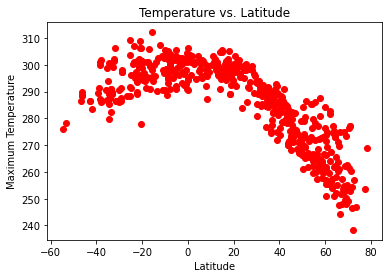

In [9]:
x_axis = weather_data_clean["Lat"]
temp = weather_data_clean["Max Temp"]
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, temp, marker="o", color="red")

#Save PNG 
plt.savefig("LatTemp.png")

plt.show()

## Latitude vs. Humidity Plot

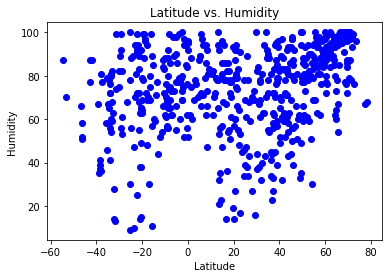

In [16]:
x_axis = weather_data_clean["Lat"]
humid_y= weather_data_clean["Humidity"]
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, humid_y, marker="o", color="blue")

#Save PNG 
plt.savefig("LatHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

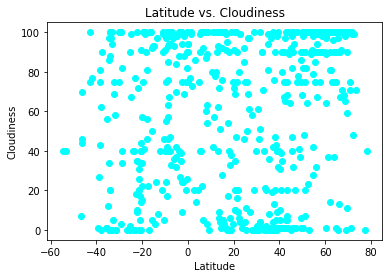

In [17]:
x_axis = weather_data_clean["Lat"]
cld = weather_data_clean["Cloudiness"]
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, cld, marker="o", color="cyan")

#Save PNG 
plt.savefig("LatCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

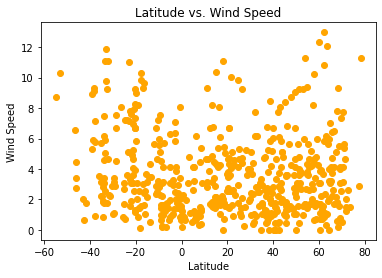

In [18]:
x_axis = weather_data_clean["Lat"]
Windsp = weather_data_clean["Wind Speed"]
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, Windsp, marker="o", color="orange")

#Save PNG 
plt.savefig("LatWind.png")
plt.show()

## Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
northemi = weather_data_clean.loc[weather_data_clean['Lat']>=0]
southemi = weather_data_clean.loc[weather_data_clean['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7902610588570859


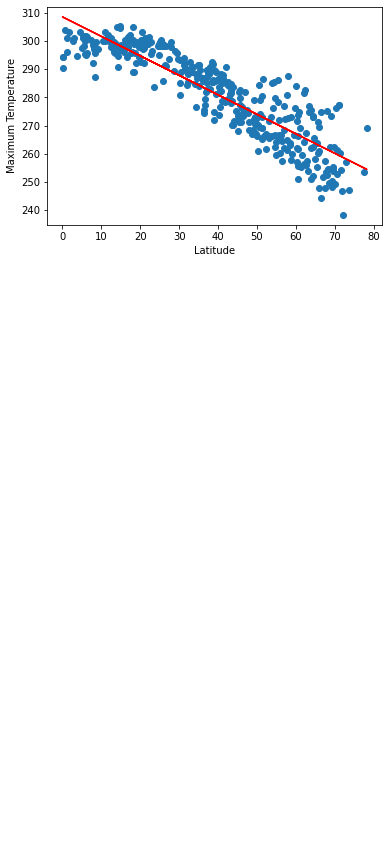

In [24]:

# Print out the r-squared value along with the plot.
north_x= northemi['Lat']
north_temp = northemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, north_temp)
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("N Hemisphere Temp vs Latitude Regression.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2852722759758009


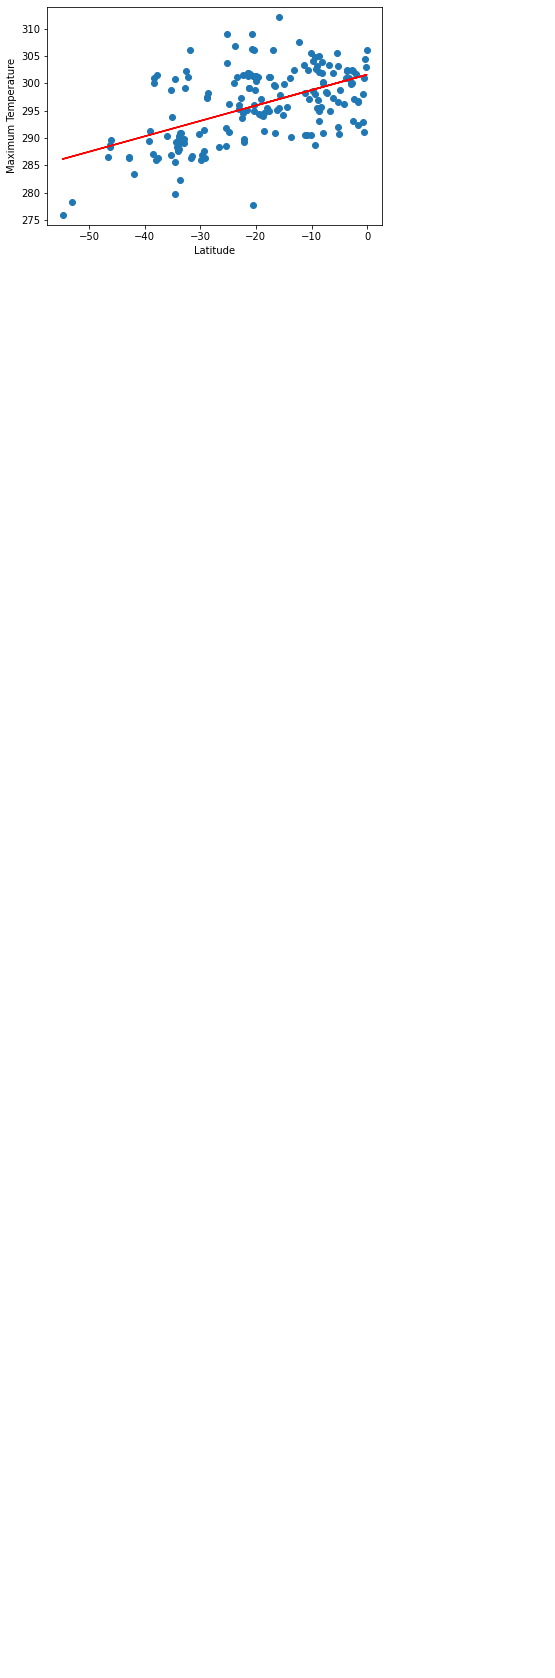

In [35]:
south_x= southemi['Lat']
south_temp = southemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, south_temp)
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("S Hemisphere Temp vs Latitude Regression.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09812377540349608


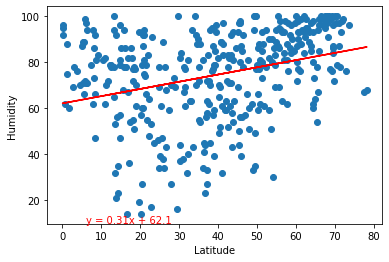

In [29]:
north_x= northemi['Lat']
north_hum = northemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_hum)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, north_hum)
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("N Hemisphere Humidity vs Latitude Regression.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04493379255864705


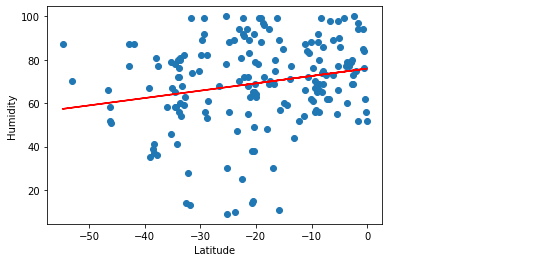

In [34]:
south_x= southemi['Lat']
south_humid = southemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_humid)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, south_humid)
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("S Hemisphere Humudity vs Latitude Regression.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.040953650112605704


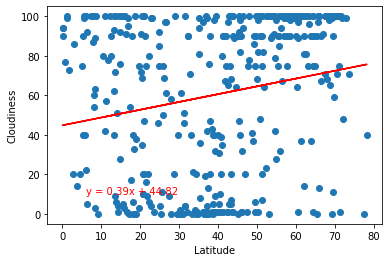

In [32]:
north_x= northemi['Lat']
north_cld = northemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_cld)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, north_cld)
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("N Hemisphere Cloudiness vs Latitude Regression.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03457694907994385


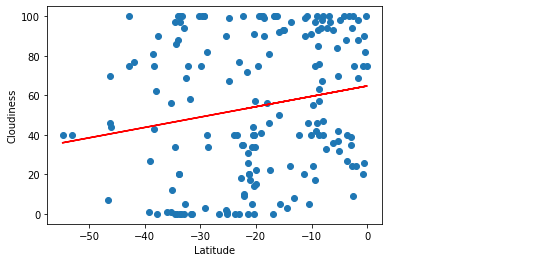

In [36]:
south_x= southemi['Lat']
south_cld = southemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_cld)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, south_cld)
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("S Hemisphere Cloudiness vs Latitude Regression.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015012043011056022


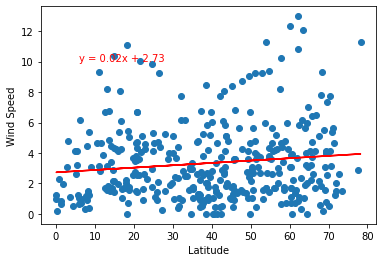

In [33]:
north_x= northemi['Lat']
north_speed = northemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_speed)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, north_speed)
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("N Hemisphere Wind Speed vs Latitude Regression.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08735330986545158


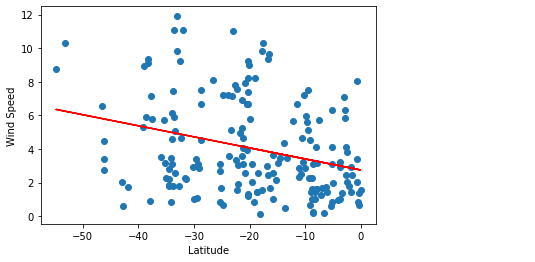

In [37]:
south_x= southemi['Lat']
south_speed = southemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_speed)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, south_speed)
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#Save PNG
plt.savefig("S Hemisphere Wind Speed vs Latitude Regression.png")

plt.show()